# Modul II 
# Ekualisasi dan Spesifikasi

### Mengimport Library

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Script "import matplotlib.pyplot as plt" digunakan untuk mengimport library matplotlib.pyplot yang digunakan untuk membuat plot grafik dan visualisasi data

Script "import numpy as np" digunakan untuk mengimport library Numpy sebagai alat bantu matematika yang sering digunakan dalam pengolahan citra

Script "import cv2 as cv" digunakan untuk mengimport library OpenCV yang digunakan untuk pengolahan citra dan video

### Memasukkan Gambar

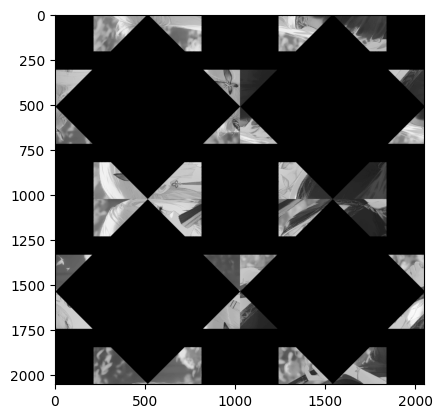

In [181]:
imgScramble = plt.imread("Res/senheScramble.jpg")
plt.imshow(imgScramble, "gray")

Script tersebut digunakan untuk membaca citra "Res/senheScramble.jpg" menggunakan fungsi imread() dari library matplotlib.image dan menampilkannya menggunakan fungsi imshow() dari matplotlib.pyplot.

imread() digunakan untuk membaca citra dari file dan mengembalikan nilai piksel citra dalam bentuk array numpy. Sedangkan imshow() digunakan untuk menampilkan citra dalam bentuk gambar.

### Rotasi

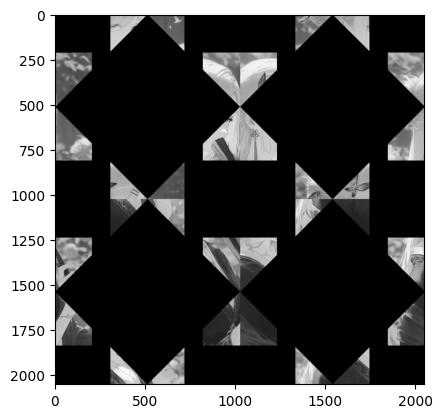

In [182]:
height,width = imgScramble.shape
rotasi = np.zeros((height, width))
sudut = np.deg2rad(90)
for i in range (height):
    for j in range (width):
        x = int ((i-width/2) * np.cos(sudut) - (j-height/2) * np.sin(sudut) + width/2)
        y = int ((i-width/2) * np.sin(sudut) + (j-height/2) * np.cos(sudut) + height/2)
        if 0 <= x < height and 0 <= y < width :
            rotasi[i, j] = imgScramble[x ,y]
plt.imshow(rotasi, cmap = "gray")

Kode di atas mengimplementasikan pemutaran gambar imgScramble sebesar 90 derajat berlawanan arah jarum jam. Pertama, variabel height dan width diinisialisasi dengan ukuran gambar, dan sebuah matriks kosong rotasi dibuat untuk menyimpan gambar yang sudah diputar. Selanjutnya, setiap piksel dalam gambar asli diiterasi, dan koordinatnya diputar menggunakan transformasi geometris dengan fungsi sinus dan kosinus. Hasilnya, piksel yang baru dihitung akan ditempatkan di posisi yang sesuai dalam matriks rotasi. Dilakukan pengecekan untuk memastikan bahwa hasil perhitungan berada dalam rentang ukuran gambar yang valid sebelum nilai piksel dari imgScramble dipindahkan ke dalam rotasi. Akhirnya, gambar yang sudah diputar ditampilkan menggunakan plt.imshow() dengan skema warna "gray".

### Membagi Citra ke Dalam 4 Potongan

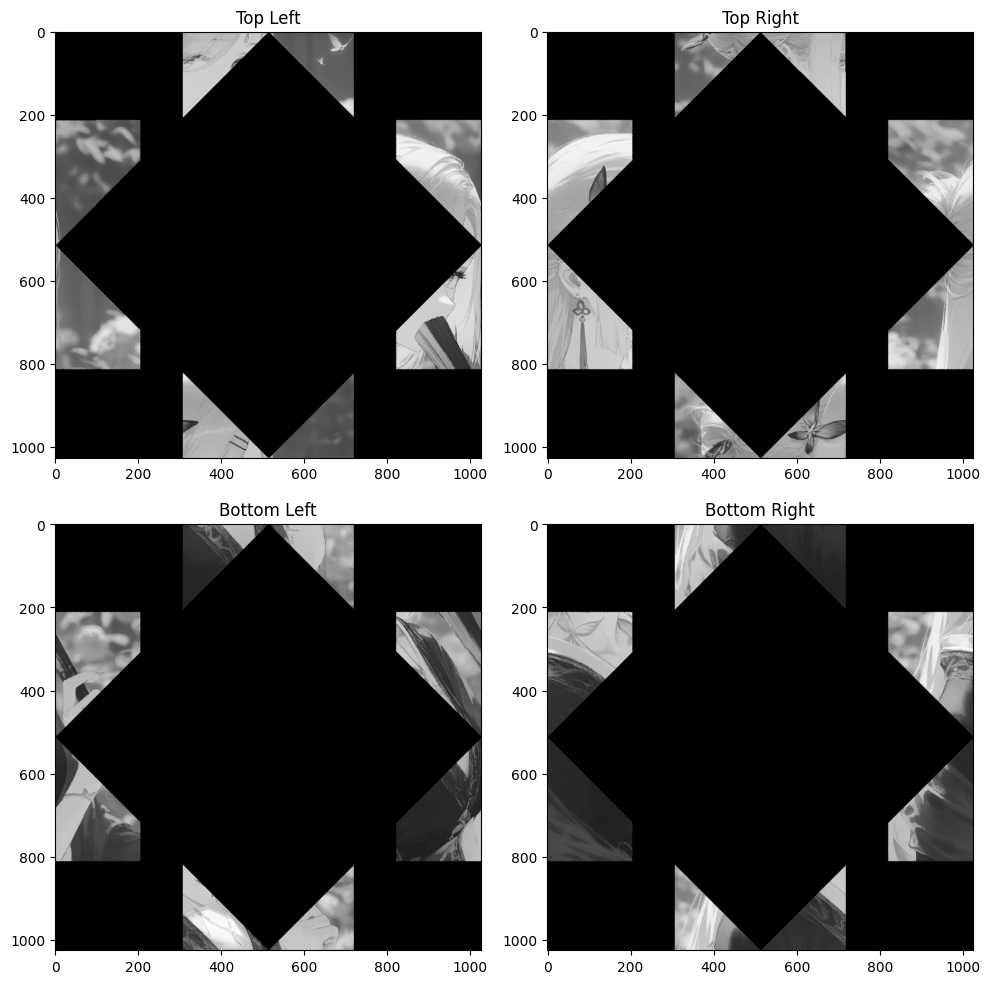

In [183]:
p1 = rotasi[:height // 2, :width // 2] #potongan pertama
p2 = rotasi[:height // 2, width // 2:] #potongan kedua
p3 = rotasi[height // 2:, :width // 2] #potongan ketiga
p4 = rotasi[height // 2:, width // 2:] #potongan keempat

plt.figure(figsize = (10, 10))
plt.subplot(221), plt.imshow(p1, cmap = 'gray'), plt.title('Top Left')
plt.subplot(222), plt.imshow(p2, cmap = 'gray'), plt.title('Top Right')
plt.subplot(223), plt.imshow(p3, cmap = 'gray'), plt.title('Bottom Left')
plt.subplot(224), plt.imshow(p4, cmap = 'gray'), plt.title('Bottom Right')

plt.tight_layout()
plt.show()

Kodingan di atas untuk membagi sebuah gambar menjadi empat potongan yang sama besar, yang kemudian ditampilkan dalam satu gambar dengan menggunakan library matplotlib. Potongan-potongan tersebut diperoleh dengan membagi gambar asli, yang diasumsikan telah dimuat sebelumnya dengan nama variabel rotasi, menjadi empat bagian sesuai dengan ukuran tinggi dan lebar gambar. Potongan-potongan tersebut kemudian disimpan dalam variabel p1, p2, p3, dan p4. Selanjutnya, menggunakan metode subplot dari matplotlib, potongan-potongan ini ditampilkan dalam satu gambar dengan empat subplot terpisah. Setiap subplot menampilkan salah satu dari empat potongan gambar, disertai dengan judul yang menjelaskan posisi potongan tersebut (Top Left, Top Right, Bottom Left, dan Bottom Right). Akhirnya, dengan menggunakan metode tight_layout(), layout subplot disesuaikan agar tidak tumpang tindih, dan gambar hasilnya ditampilkan dengan memanggil show() dari matplotlib. Dengan demikian, kodingan ini memberikan visualisasi yang jelas tentang bagaimana gambar asli dibagi menjadi empat potongan yang sama besar dan ditampilkan secara terstruktur dalam satu gambar.

### Membuat Fungsi Translasi

In [184]:
def transalasi(image, geser):
	height, width = image.shape[:2]
	newImg = np.zeros((height, width)).astype(int)

	for y in range(0, 210): #buat segitiga atas
		for x in range(200, 820):
			if not 0 <= image[y, x] <= 20:
				newImg[y + geser, x ] = image[y, x]
	
	for y in range(800, height): #buat segitiga bawah
		for x in range(210, 820):
			if not 0 <= image[y, x] <= 20:
				newImg[y - geser, x ] = image[y, x]
    
	for y in range(210, 820): #buat segitiga kiri
		for x in range(0, 210):
			if not 0 <= image[y, x] <= 20:
				newImg[y, x + (geser-1)] = image[y, x]
	
	for y in range(210, 820): #buat segitiga kanan
		for x in range(820, width):
			if not 0 <= image[y, x] <= 20:
				newImg[y, x-(geser-1)] = image[y, x]
    
	return newImg

Fungsi translasi digunakan untuk melakukan proses pergeseran terhadap citra yang diberikan sesuai dengan nilai pergerseran yang ditentukan. Fungsi ini menginisialisasi matriks baru terlebih dahulu dengan ukuran yang sama dengan citra asli, namun berisi nilai 0. Selanjutnya, fungsi ini memproses citra menggunakan empat perulangan berulang, masing-masing melakukan satu sisi citra, yaitu atas, bawah, kiri, dan kanan. Perulangan-perulangan tersebut mengecek setiap piksel pada sisi yang sesuai dan jika nilai piksel tersebut tidak berada dalam rentang antara 0 hingga 20, nilai piksel tersebut akan disalin ke posisi yang sesuai dalam matriks citra yang baru. Fungsi ini mengembalikan citra yang telah dilakukan translasi.

### Melakukan Proses Translasi Pada Citra

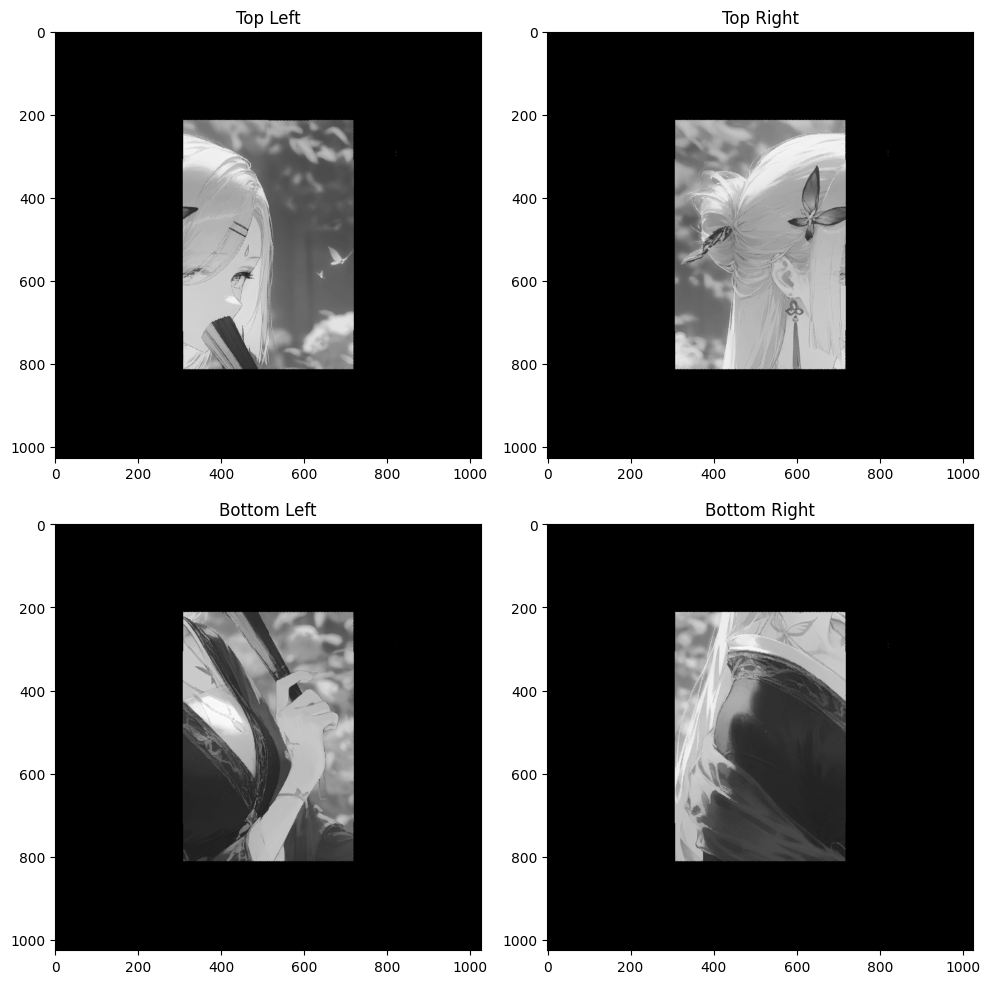

In [185]:
p1 = transalasi(p1, p1.shape[0]//2)
p2 = transalasi(p2, p1.shape[0]//2)
p3 = transalasi(p3, p1.shape[0]//2)
p4 = transalasi(p4, p1.shape[0]//2)

plt.figure(figsize = (10, 10))
plt.subplot(221), plt.imshow(p1, cmap = 'gray'), plt.title('Top Left')
plt.subplot(222), plt.imshow(p2, cmap = 'gray'), plt.title('Top Right')
plt.subplot(223), plt.imshow(p3, cmap = 'gray'), plt.title('Bottom Left')
plt.subplot(224), plt.imshow(p4, cmap = 'gray'), plt.title('Bottom Right')

plt.tight_layout()
plt.show()

Kode di atas mengimplementasikan proses translasi terhadap empat gambar yang diberi label p1, p2, p3, dan p4. Translasi dilakukan dengan memanggil fungsi transalasi() untuk setiap gambar dan menggesernya sejauh setengah dari tinggi gambar tersebut, yang ditentukan dengan p1.shape[0] // 2. Translasi adalah proses menggeser suatu objek ke arah tertentu dalam ruang dua dimensi atau tiga dimensi tanpa memutarnya. Dalam konteks ini, transalasi() berfungsi untuk memindahkan setiap gambar sejauh setengah tinggi gambar ke bawah, sehingga mengubah posisi relatifnya terhadap gambar-gambar lainnya.

### Membuat Fungsi Remove Padding

In [186]:
def removePadd(image):
    return image[215:810, 310:717]
# atas:bawah, kiri:kanan

Fungsi removePadd(image) digunakan untuk menghapus area padding dari suatu gambar. Area padding adalah area di sekitar tepi gambar yang sering kali ditambahkan untuk berbagai tujuan seperti penambahan border atau operasi cropping. Dalam kasus ini, area padding dihilangkan dengan mengambil potongan gambar dari baris ke-215 hingga ke-810 dan kolom ke-310 hingga ke-717. Jadi, fungsi ini mengembalikan gambar yang lebih kecil tanpa bagian padding, dengan batasan atas, bawah, kiri, dan kanan yang telah ditentukan sesuai komentar di dalam fungsi.

### Melakukan Proses Remove Padding

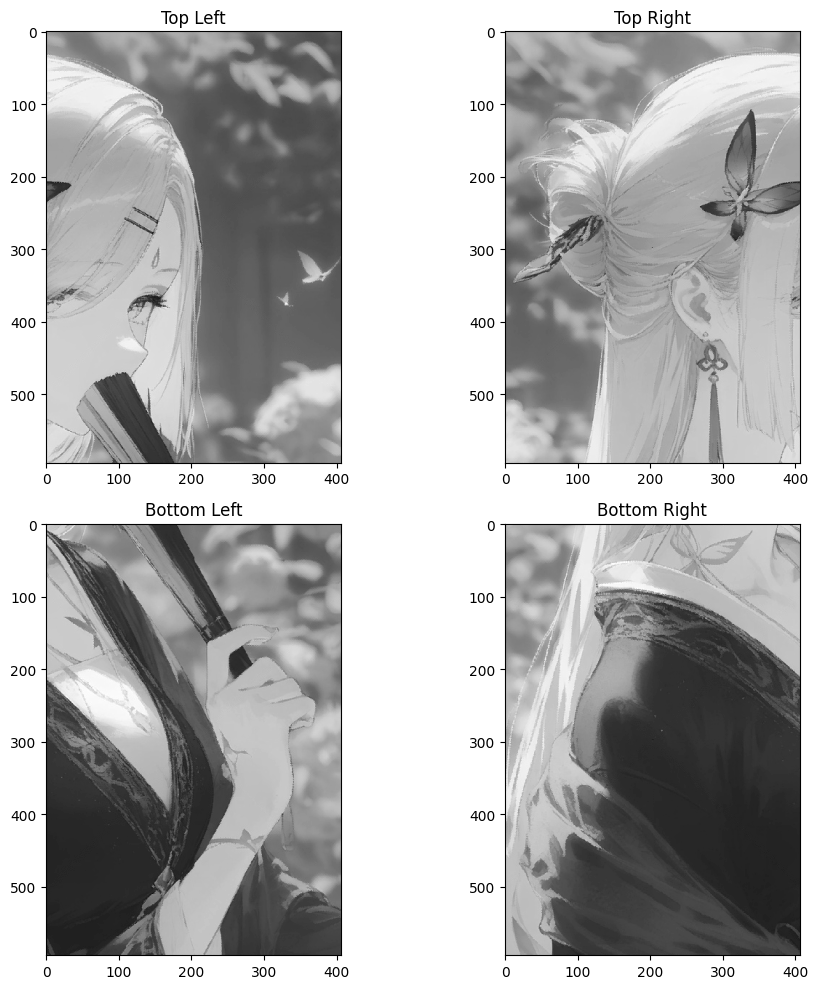

In [187]:
p1 = removePadd(p1)
p2 = removePadd(p2)
p3 = removePadd(p3)
p4 = removePadd(p4)

plt.figure(figsize = (10, 10))
plt.subplot(221), plt.imshow(p1, cmap = 'gray'), plt.title('Top Left')
plt.subplot(222), plt.imshow(p2, cmap = 'gray'), plt.title('Top Right')
plt.subplot(223), plt.imshow(p3, cmap = 'gray'), plt.title('Bottom Left')
plt.subplot(224), plt.imshow(p4, cmap = 'gray'), plt.title('Bottom Right')

plt.tight_layout()
plt.show()

Kode di atas merupakan bagian untuk melakukan remove padding terhadap keempat bagian gambar yang telah di translasi sebelumnya, yaitu 'p1', 'p2', 'p3', dan 'p4'. Proses dilakukan dengan pemanggilan fungsi remove padding dengan parameter masing-masing bagian dan menampilkan hasilnya.

### Menggabungkan Keempat Bagian Citra

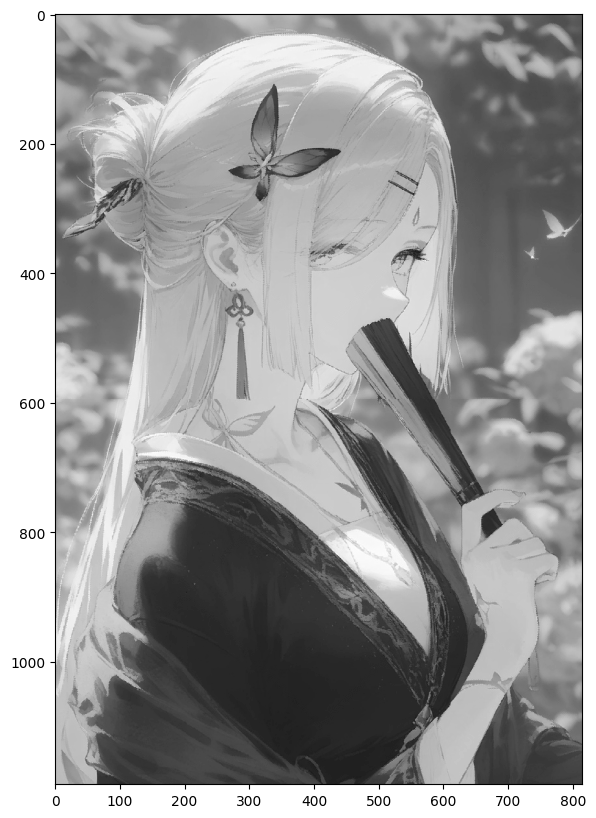

In [188]:
shenhe = np.zeros((p1.shape[0]*2, p1.shape[1]*2)).astype(np.uint8)
shenhe[:p2.shape[0], :p2.shape[1]] = p2
shenhe[:p1.shape[0], p1.shape[1]:] = p1
shenhe[p4.shape[0]:, :p4.shape[1]] = p4
shenhe[p3.shape[0]:, p3.shape[1]:] = p3

plt.figure(figsize=(10, 10))
plt.imshow(shenhe, cmap='gray')


Kodingan di atas bertujuan untuk menyusun beberapa gambar menjadi satu gambar besar dalam bentuk matriks yang disimpan dalam variabel shenhe. Pertama, sebuah matriks kosong shenhe dibuat dengan ukuran dua kali lebih besar dari gambar p1 dalam dimensi baris dan dua kali lebih besar dari gambar p1 dalam dimensi kolom. Kemudian, setiap gambar (p1, p2, p3, dan p4) ditempatkan dalam shenhe sesuai dengan posisi relatifnya.

Potongan 2 ditempatkan di bagian kiri atas shenhe.
Potongan 1 ditempatkan di sebelah kanan atas shenhe.
Potongan 4 ditempatkan di sebelah kiri bawah shenhe.
Potongan 3 ditempatkan di bagian kanan bawah shenhe.

Setiap gambar diatur dalam matriks shenhe dengan menggunakan slicing untuk menempatkannya pada lokasi yang tepat. Setelah semua gambar ditempatkan, gambar gabungan tersebut ditampilkan menggunakan plt.imshow(), dengan skema warna "gray".

### Mendapatkan Intensitas pada Tiap Piksel

In [189]:
def getIntensity(img):
    # height, width = img.shape
    intensity = np.zeros(256).astype(int)
    #membuat array berisikan 0 dengan besaran 256 dan menampung tipe data integer
    for i in range (img.shape[0]):
        for j in range (img.shape[1]):
            intensity[img[i, j]] += 1
    return intensity

Fungsi getIntensity() digunakan untuk mendapatkan intesitas dari tiap piksel pada citra 1 yang telah diubah ke dalam grayscale. Pada fungsi ini digunakan parameter, yakni citra yang akan dihitung intensitas pikselnya. Apabila diamati setiap nilai pixel akan dimasukkan ke dalam variabel histogram dan apabila ditemui nilai pixel yang sama lagi maka akan ditambahkan satu

ex: pada array img[0][0] == 0 maka indeks variabel histogram akan menjadi histogram[0]

### Mencari Probabilitas Kemunculan tiap Pixel

In [190]:
def probability(img):
    normalHist = getIntensity(img)
    probs = np.zeros(256, dtype = float)
    for i in range (len(probs)):
        probs[i] = normalHist[i]/sum(normalHist)
    return probs

Fungsi probability() digunakan untuk mencari probabilitas kemuncunlan tiap pixel di dalam citra dengan parameter adalah citra yang akan dihitung. Pada fungsi ini akan dipanggil terlebih dahulu intensitas tiap pixel dengan fungsi getIntensity(). Berikutnya tiap intensitas akan dibagi dengan total intensitas keseluruhan. Nilai hasil disimpan ke dalam variabel probs.

### Mencari Nilai Kumulatif dari Nilai Probabilitas

In [191]:
def cumulative(img):
    probs = probability(img)
    #mencari probabilitas kemunculan pixel dengan memanggil fungsi probability
    cumulative = np.zeros(256, dtype = float)
    for i in range (len(cumulative)):
        if i == 0:
            #apabila indeks pada 0 maka tidak dilakukan penjumlahan kumulatif sehingga nilai tetap
            cumulative[i] = probs[i]
        else:
            cumulative[i] = probs[i] + cumulative[i-1]
            #apabila indeks lebih dari 0 maka akan dilakukan penjumlahan nilai probabilitas pada indeks yang ditunjuk
            #dengan probabilitas pada indeks-1
    return cumulative

Fungsi cumulative() digunakan untuk mencari nilai hasil penjumlahan probabilitas suatu indeks dengan indeks sebelumnya.

### Mengalikan Nilai Kumulatif dengan Level Keabuan Tertinggi

In [192]:
def rounding(img):
    cumulative_res = cumulative(img)
    rounded = np.zeros(256, dtype = int)
    #variabel rounded digunakan untuk menyimpan hasil pembulatan dan hanya dapat menampung tipe data integer
    for i in range (len(rounded)):
        rounded[i] = np.round(cumulative_res[i] * 255)
    return rounded

Fungsi rounding() digunakan dengan mengalikan nilai tiap perhitungan kumulatif yang telah dilakukan pada fungsi cumulative() dengan nilai keabuan tertinggi yang dalam hal ini adalah 255. Setelah dilakukan proses perkalian, berikutnya akan dilakukan pembulatan ke atas menggunakan fungsi round.

### Remapping Hasil Ekualisasi

In [193]:
#re-mapping hasil ekualisasi 
def remapp(result, img):
    final = np.zeros(((img.shape[0]), (img.shape[1])), dtype=int)
    for i in range(final.shape[0]):
        for j in range (final.shape[1]):
            final[i, j] = result[img[i, j]]
    return final

Fungsi remapp() digunakan untuk melakukan pemetaan kembali hasil ekualisasi ke dalam citra. Fungsi ini menggunakan 2 parameter, yaitu result yang merupakan array hasil perhitungan baik spesifikasi maupun ekualisasi dan img yang merupakan citra yang digunakan dalam pemetaan hasil perhitungan. Dalam fungsi ini, nilai piksel pada citra img akan digantikan nilainya dengan nilai pada variabel rounded dengan indeks sesuai nilai piksel yang ditunjuk.

ex: grayimg[0][0] = 1 maka rounded[1]
Beriktunya variabel final[i][j] akan diisi dengan nilai dari variabel rounded pada indeks ke-1

### Membuat Hasil Ekualisasi Citra

In [194]:
resultEq = rounding(shenhe)
resultEq = remapp(resultEq, shenhe)

Kodingan di atas bertujuan untuk melakukan pengolahan tambahan terhadap gambar yang telah digabungkan sebelumnya dan disimpan dalam variabel shenhe. Tahap pertama adalah pemanggilan fungsi rounding(shenhe), yang menghasilkan array baru yang berisi nilai piksel yang sudah dibulatkan.

Hasil dari proses rounding disimpan dalam variabel resultEq. Selanjutnya, variabel ini dimasukkan ke dalam fungsi remapp() bersama dengan gambar awal shenhe. Fungsi remapp() melakukan pemetaan ulang nilai piksel dalam gambar hasil ekualisasi berdasarkan nilai-nilai yang telah diubah setelah proses pembulatan. Proses ini menghasilkan gambar yang telah diproses lebih lanjut dengan mengikuti langkah-langkah tersebut, dan disimpan kembali dalam variabel resultEq.

### Menampilkan Hasil Sebelum dan Setelah Ekualisasi

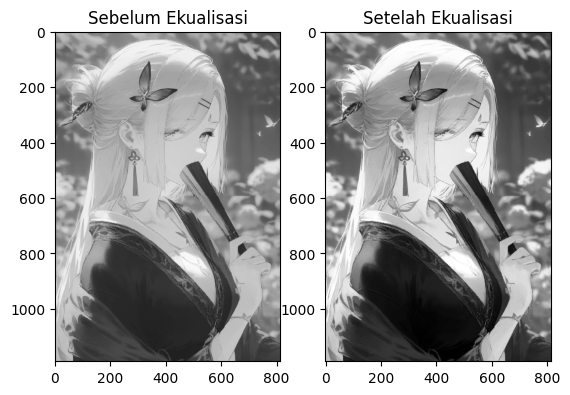

In [195]:
f, ax = plt.subplots(1,2)
#membuat subplots dengan 1 baris dan 2 kolom

ax[0].imshow(shenhe, cmap = 'gray') 
ax[0].set_title("Sebelum Ekualisasi")

ax[1].imshow(resultEq, cmap = 'gray') 
ax[1].set_title("Setelah Ekualisasi")

plt.show()

Menampilkan dua citra grayscale sebelum dan setelah proses ekualisasi histogram. Sebelumnya, citra mungkin memiliki distribusi intensitas yang tidak merata. Setelah ekualisasi, distribusi intensitas disesuaikan, meningkatkan detail dan kontras citra, menghasilkan gambar yang lebih baik.

### Membuat Histogram Sebelum dan Setelah Ekualisasi

In [196]:
grayIndex = [i for i in range (256)]
histoShenhe = getIntensity(shenhe)
histoEqualisasiShenhe = getIntensity(resultEq)

Kodingan di atas terdiri dari dua langkah. Pertama, sebuah array yang disebut grayIndex dibuat menggunakan list comprehension. Array ini berisi nilai-nilai dari 0 hingga 255, merepresentasikan indeks intensitas piksel dalam skala abu-abu, mulai dari hitam hingga putih. Langkah kedua melibatkan perhitungan histogram intensitas piksel dari dua gambar, yaitu shenhe (sebelum ekualisasi) dan resultEq (setelah ekualisasi), menggunakan fungsi getIntensity(). Histogram ini mencerminkan frekuensi kemunculan setiap nilai intensitas dalam gambar, yang kemudian disimpan dalam variabel histoShenhe dan histoEqualisasiShenhe.

### Menampilkan Histogram Sebelum dan Setelah Ekualisasi

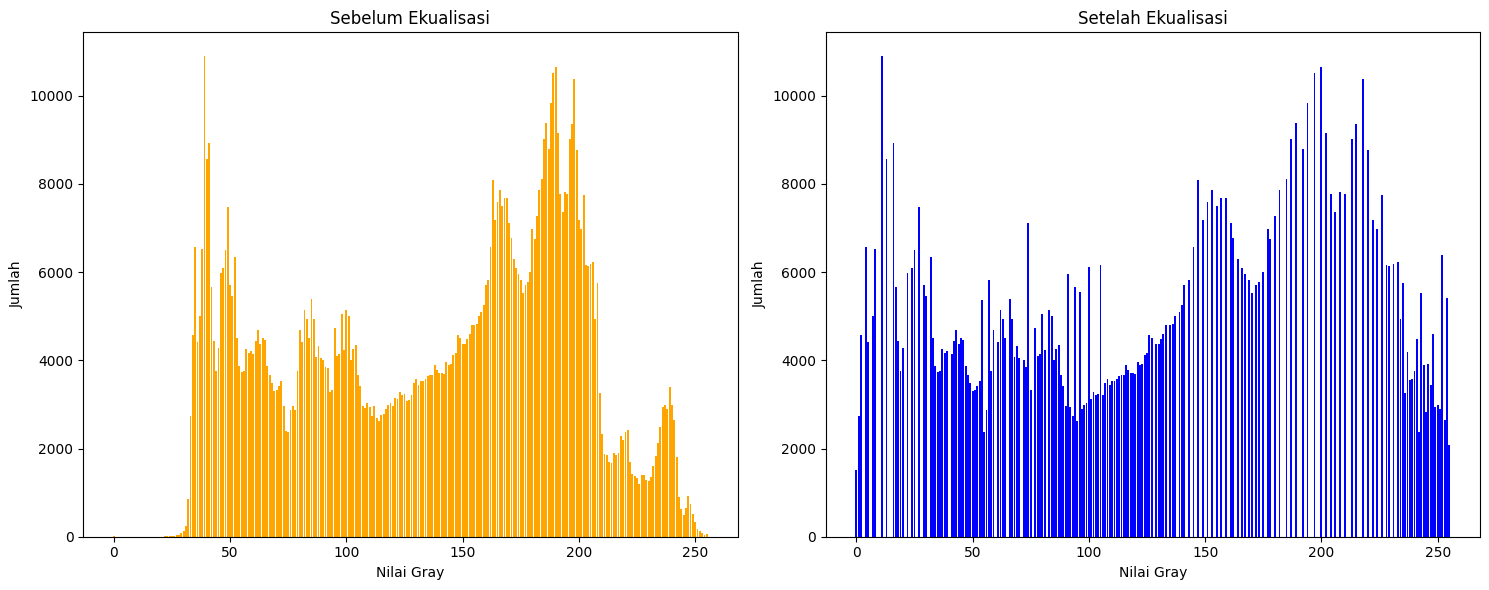

In [197]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].set_title('Sebelum Ekualisasi')
axs[0].set_xlabel('Nilai Gray')
axs[0].set_ylabel('Jumlah')
axs[0].bar(grayIndex, histoShenhe, color = 'orange')

axs[1].set_title('Setelah Ekualisasi')
axs[1].set_xlabel('Nilai Gray')
axs[1].set_ylabel('Jumlah')
axs[1].bar(grayIndex, histoEqualisasiShenhe, color = 'blue')

plt.tight_layout()
plt.show()

Script di atas merupakan code yang digunakan untuk menampilkan histogram sebelum dan setelah ekualisasi.

### Membuat Fungsi Gray dengan Filtering

In [198]:
def grayScaling(img):
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
   
    kernel = np.ones((3, 3)) / 9
    
    filteredR = cv.filter2D(r, -1, kernel)
    filteredG = cv.filter2D(g, -1, kernel)
    filteredB = cv.filter2D(b, -1, kernel)
    
    return np.round(filteredR/3 + filteredG/3 + filteredB/3).astype(np.uint8)

Script di atas merupakan code yang diguakan untuk memebuat citra menjadi citra yang abu. Metode yang digunakan yaitu normal distribution dengan bantuan kernel 3 x 3

### Menampilkan Citra Sebelum dan Setelah Gray Scaling

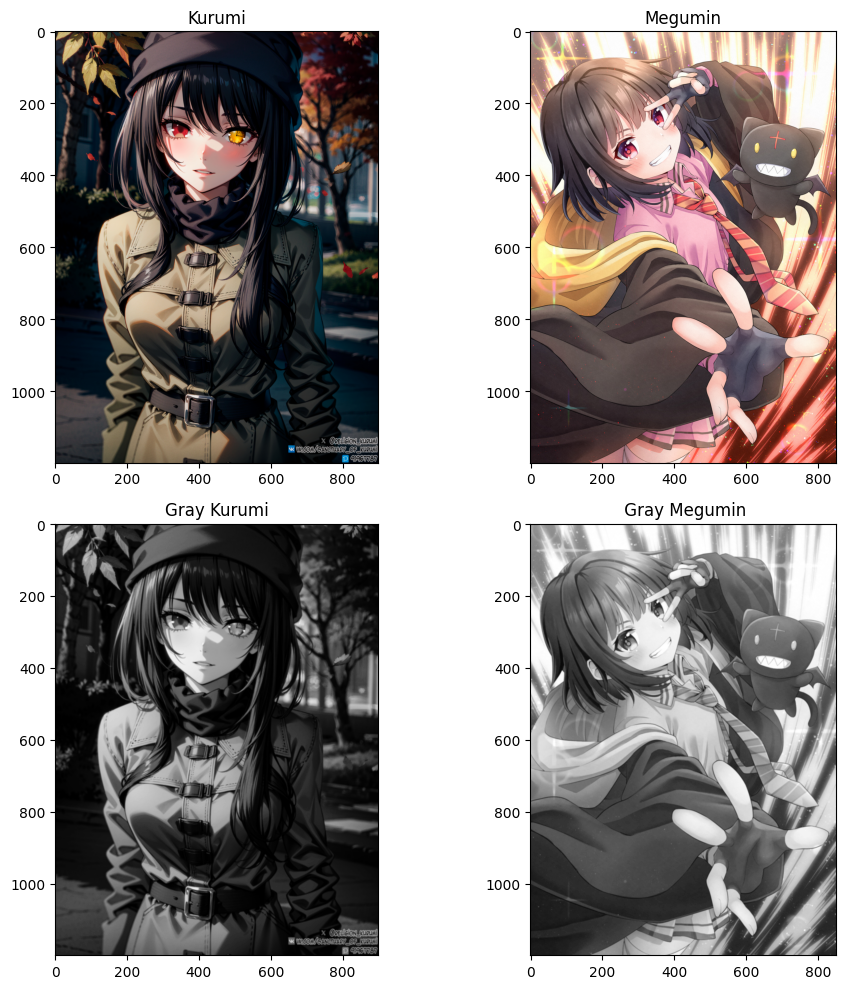

In [199]:
kurumi = plt.imread('Res/kurumi.jpg')
megumin = plt.imread('Res/megumin.jpg')

grayKurumi = grayScaling(kurumi)
grayMegumin = grayScaling(megumin)

plt.figure(figsize = (10, 10))
plt.subplot(221), plt.imshow(kurumi, cmap = 'gray'), plt.title('Kurumi')
plt.subplot(222), plt.imshow(megumin, cmap = 'gray'), plt.title('Megumin')
plt.subplot(223), plt.imshow(grayKurumi, cmap = 'gray'), plt.title('Gray Kurumi')
plt.subplot(224), plt.imshow(grayMegumin, cmap = 'gray'), plt.title(' Gray Megumin')

plt.tight_layout()
plt.show()

Script di atas merupakan sebuah code yang digunakan untuk meng-import citra kurumi dan megumin lalu mengubahnya menjadi citra abu dengan fungsi grayScaling.

### Membuat Fungsi Final Mapping

In [200]:
def finalMapping(source, target):
    final  = np.zeros(256, dtype = int)
    for i in range (len(source)):
        minval = abs(source[i] - target[0])
        #menggunakan fungsi abs untuk menghindari hasil pengurangan berupa negatif
        minj = 0
        for j in range (len(target)):
            temp = abs(source[i] - target[j])
            if temp < minval:
                minval = temp
                minj   = j - 1
        final[i] = minj
    return final

Fungsi finalMapping() digunakan untuk melakukan pemetaan pada proses spesifikasi. Pada fungsi ini, nilai piksel dari citra asal akan dikurangi dengan tiap nilai intensitas dari citra target untuk mencari nilai terdekat dan ditampung ke variabel temp. Pengurangan ini akan dilakukan sampai indeks terakhir pada citra asal. Setiap perulangan, nilai dari variabe temp akan dibandingkan dengan nilai dari variabel minval. Apabila temp lebih kecil dari minval maka nilai minval akan berganti dengan nilai dari temp begitu juga minj j yang akan diisi dengan nilai j dikurangi 1. Jika perulangan telah selesai, nilai variabel final pada indeks ke-i akan diisi dengan nilai dari minj

### Membuat Fungsi Spesifikasi

In [201]:
def spesifikasi(source, target):
    img =  rounding(source)
    target = rounding(target)
    spesifikasi = finalMapping(img, target)
    result = remapp(spesifikasi, source)
    return result


Fungsi spesifikasi(source, target) bertujuan untuk melakukan spesifikasi histogram dari gambar sumber (source) ke gambar target (target). Pertama, gambar sumber dan gambar target dibulatkan intensitas pikselnya menggunakan fungsi rounding(), menghasilkan gambar yang sudah diproses. Selanjutnya, fungsi finalMapping() dipanggil dengan gambar sumber yang sudah diproses dan gambar target yang sudah dibulatkan sebagai argumen. Fungsi finalMapping() digunakan untuk melakukan pemetaan yang lebih akurat antara gambar sumber dan target dengan tujuan menyesuaikan histogram gambar sumber agar sesuai dengan histogram gambar target.

Hasil dari proses pemetaan tersebut disimpan dalam variabel spesifikasi. Selanjutnya, fungsi remapp() digunakan untuk memetakan ulang gambar sumber sesuai dengan hasil pemetaan yang telah dilakukan, menghasilkan gambar hasil yang disimpan dalam variabel result. Akhirnya, gambar hasil ini dikembalikan sebagai output dari fungsi spesifikasi().

### Menampilkan Hasil Spesifikasi

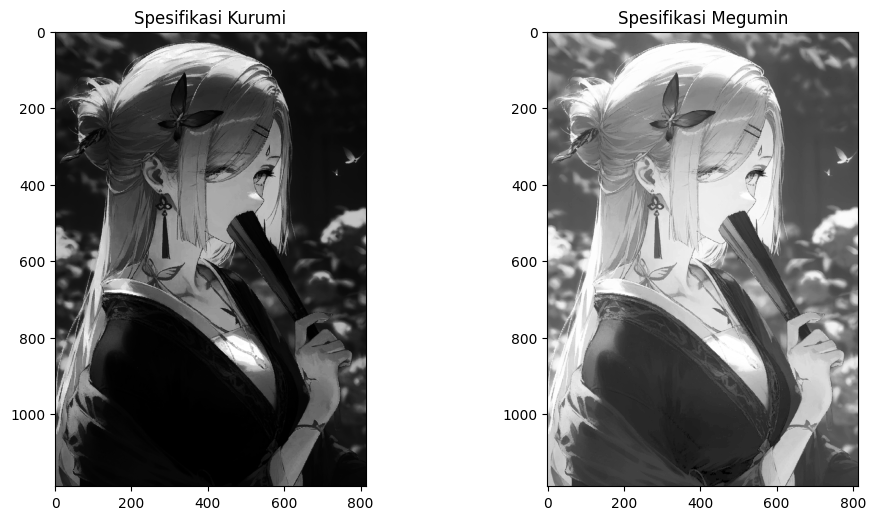

In [202]:
plt.figure(figsize = (10, 10))
plt.subplot(221), plt.imshow(spesifikasi(resultEq, grayKurumi), cmap = 'gray'), plt.title('Spesifikasi Kurumi')
plt.subplot(222), plt.imshow(spesifikasi(resultEq, grayMegumin), cmap = 'gray'), plt.title('Spesifikasi Megumin')

plt.tight_layout()
plt.show()

Script di atas merupakan code yang digunakan untuk melakukan spesifikasi dengan fungsi spesifikasi. Citra hasil ekualisasi shenhe digunakan sebagai sumber dan targetnya ada citra abu dari kurumi dan megumin.

### Kesimpulan

Pada spesifikasi dengan target kurumi gambar yang di hasilkan cendrung lebih gelap. ini di akibatkan citra target yang diberikan juga condong ke arah gelap. sebaliknya citra hasil spesifikasi dengan target gambar megumin menghasilkan hasil spesifikasi yang lebih terang dari spesifikasi kurumi karena di sebabkan target megumin condong ke arah citra yang terang.

### Membuat Fungsi untuk Memecah Citra

In [203]:
def split(img, row = 1, column = 1):
    height, width = img.shape[:2]
    tinggi = height // row
    lebar = width // column
    citra = []
    for i in range(row):
        for j in range(column):
            theSplit = img[i * tinggi: (i + 1) * tinggi, j * lebar: (j + 1) * lebar]
            citra.append(theSplit)
    return citra

Script di atas merupakan code yag digunakan untuk membagi gambar menjadi sejumlah pecahan berdasarkan jumlah baris (row) dan kolom (column) yang ditentukan. Pada setiap perulangan akan memotong gambar asli menjadi bagian-bagian yang lebih kecil atau berdasarkan indeks baris dan kolom yang ditentukan dan disimpan ke dalam pecahan yang kemudian akan digabung dalam array result untuk dikembalikan.

### Membuat Fungsi untuk Menggabungkan Hasil Pecahan Citra

In [204]:
def merge(img, row = 1, column = 1):
    height, width = img[0].shape[:2]
    tinggi = height * row
    lebar = width * column
    citra = np.zeros((tinggi, lebar)).astype(np.uint8)
    for i in range(row):
        for j in range(column):
            citra[i * height: (i + 1) * height, j * width: (j + 1) * width] = img[i * column + j]
    return citra

Script di atas merupakan code yag digunakan untuk menggabungkan (merge) beberapa pecahan gambar menjadi satu gambar keseluruhan. Ini digunakan untuk mengembalikan gambar yang telah dibagi-bagi menjadi pecahan ke bentuk aslinya. Pada setiap perulangan, setiap pecahan dalam list img akan ditempatkan dalam posisi yang sesuai di dalam array citra yang kemudian nanti menjadi nilai kembalian gambar yang utuh.

### Membuat Fungsi untuk Menghitung Rata-Rata

In [205]:
def mean(img):
    height, width = img.shape[:2]
    result = 0
    for i in range(height):
        for j in range(width):
            result += img[i, j]
    return result / (height * width)


Script di atas merupakan code yang digunakan untuk mencari rata pixel yang ada pada sebuah citra. Pada setiap perulangan, nilai result akan ditambah dengan pixel dari citra dengan index yang sedang diakses atau dengan kata lain untuk menemukan sum pixel dari citra. Setelah itu akan mengembalikan nilai result dibagi dengan jumlah index citra.

### Membuat Fungsi Spesifikasi Pecahan

In [206]:
def spesificationPcs(img):
    result = []
    for i in img:
        pcs = np.zeros(i.shape).astype(int)
        if mean(i) <= 128:
            pcs = spesifikasi(i, grayKurumi)
            result.append(pcs)
        else:
            pcs = spesifikasi(i, grayMegumin)
            result.append(pcs)
    return result

Script di atas merupakan code yang digunakan untuk men-spesifikasi setiap pecahan gambar. Terapat iterasi untuk mengakses semua pecahan. Jika rata-rata dari pecahan yang sedang diakses kurang dari sama dengan 128, maka akan dispesifikasi dengan citra abu dari kurumi. Jika tidak, maka akan dispesifikasi dengan citra abu dari megumin

### Spesifikasi Pecahan

(-0.5, 799.5, 1183.5, -0.5)

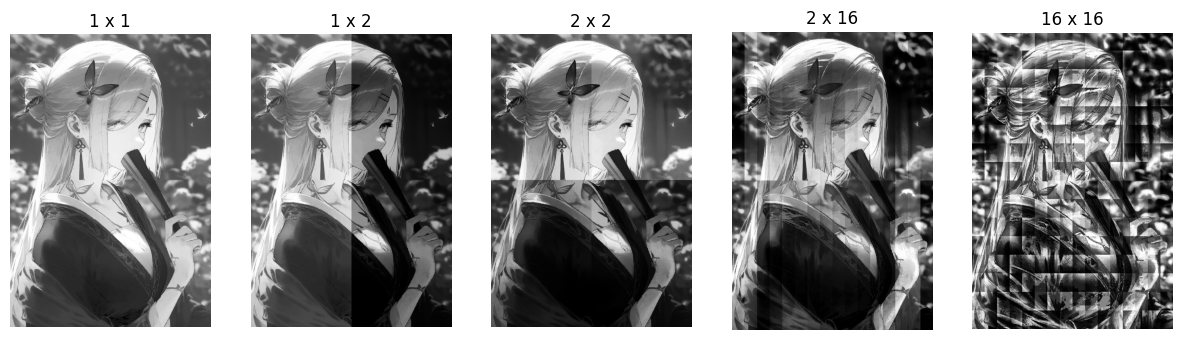

In [207]:
plt.figure(figsize=(15, 15))

split1x1 = split(resultEq)
spesification1x1 = spesificationPcs(split1x1)
merge1x1 = merge(spesification1x1)

split1x2 = split(resultEq, column = 2)
spesification1x2 = spesificationPcs(split1x2)
merge1x2 = merge(spesification1x2, column = 2)

split2x2 = split(resultEq, row = 2, column = 2)
spesification2x2 = spesificationPcs(split2x2)
merge2x2 = merge(spesification2x2, row = 2, column = 2)

split2x16 = split(resultEq, row = 2, column = 16)
spesification2x16 = spesificationPcs(split2x16)
merge2x16 = merge(spesification2x16, row = 2, column = 16)

split16x16 = split(resultEq, row = 16, column = 16)
spesification16x16 = spesificationPcs(split16x16)
merge16x16 = merge(spesification16x16, row = 16, column = 16)

plt.subplot(1, 5, 1)
plt.title('1 x 1')
plt.imshow(merge1x1, cmap = 'gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('1 x 2')
plt.imshow(merge1x2, cmap = 'gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('2 x 2')
plt.imshow(merge2x2, cmap = 'gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('2 x 16')
plt.imshow(merge2x16, cmap = 'gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title('16 x 16')
plt.imshow(merge16x16, cmap = 'gray')
plt.axis('off')

Script di atas merupakan code yang digunakan untuk melakukan spesifikasi gambar yang telah dipecah dengan ukuran row dan column yang ditentukan. Gambar yang digunakan adalah gambar shenhe yang telah diekualisasi. Gambar dipecah dengan fungsi split() kemudian di spesifikasi dengan fungsi spesificationPcs(). Terakhir, gambar digabung dengan fungsi merge().

### Analisa Hasil Spesifikasi Pecahan

Pada pecahan 1 x 1, keseluruhan gambar dispesifikasi dengan citra abu dari megumin karena rata rata dari pixelnya lebih dari 128. Dengan dispesifikasi menggunakan citra abu megumin, gambar yang dihasilkan menjadi lebih cerah.

Pada pecahan 1 x 2, karena gambar dipecah menjadi 2 bagian, rata rata intensitasnya berkurang pada bagian kedua(kanan). Seperti yang dapat dilihat pada hasil ekualisasi shenhe, pada bagian kanan terdapat lebih banyak pixel hitam yang membuat rata-ratanya kurang dari 128 dan membuatnya dispesifikasi dengan citra abu dari Kurumi. Sedangkan untuk bagian pertama(kiri) dispesifikasi dengan citra abu dari megumin karena disitu terdapat lebih banyak pixel putih sehingga membuat rata-ratanya berada diatas 128

Keseluruhan gambar telah disesuaikan dengan citra abu-abu dari Kurumi karena rata-rata nilai pikselnya kurang dari atau sama dengan 128, sehingga membuat gambar terlihat lebih gelap. Di sisi lain, gambar-gambar tersebut juga telah disesuaikan dengan citra abu-abu dari Megumin karena rata-rata nilai pikselnya melebihi 128, yang membuatnya terlihat lebih cerah.

Meskipun gambar-gambar dengan spesifikasi kasar, seperti "1x1" dan "1x2", cenderung memiliki resolusi rendah dan detail yang kurang jelas, gambar-gambar dengan spesifikasi lebih tinggi, seperti "16x16", menampilkan detail yang lebih tajam dan jelas, memudahkan identifikasi objek. Dalam hal segmentasi citra, spesifikasi yang lebih tinggi memberikan hasil yang lebih baik dalam memisahkan objek dari latar belakang, yang terlihat dalam gambar "16x16" di mana objek lebih terpisah dengan jelas.

Melakukan spesifikasi dan segmentasi citra dengan resolusi yang lebih tinggi memiliki dampak positif, menghasilkan gambar yang lebih jelas, detail yang lebih baik, dan pemisahan yang lebih baik antara objek dan latar belakang.